In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px
#import eli5
import graphviz
import networkx as nx

##from eli5.sklearn import PermutationImportance
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt
#from pdpbox import pdp, get_dataset, info_plots
from string import ascii_letters
#from colorama import Fore, Back, Style
#y_ = Fore.YELLOW
#r_ = Fore.RED
#g_ = Fore.GREEN
#b_ = Fore.BLUE
#m_ = Fore.MAGENTA

In [3]:
!pip install geopy 
!pip install Nominatim
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2365 sha256=34f7cee2039eb96d6913d31ab2133e714e20a9b85432f9c357e38e34f59e4475
  Stored in directory: /root/.cache/pip/wheels/37/00/9e/d904c390bfb174830ad3dcfd62af5544cee7d88bed4f8acedd
Successfully built Nominatim
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

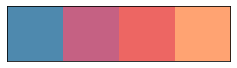

In [5]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

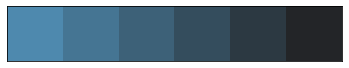

In [6]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

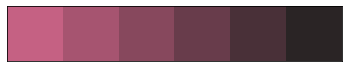

In [7]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

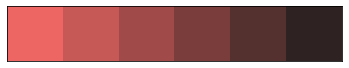

In [8]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

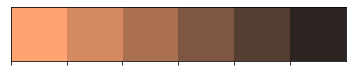

In [9]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

In [10]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mumbai.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Delhi.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chennai.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hyderabad.csv')

In [11]:
df1.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [12]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
df3.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [14]:
df4.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [16]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [17]:
print(f"Mumbai:{df1.shape}\n")
print(f"Delhi:{df2.shape}\n")
print(f"Chennai:{df3.shape}\n")
print(f"Hyderabad:{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)



In [18]:
print(f"Data types of data columns: \n{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [19]:
print(f"Data types of data columns: \n{df2.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [20]:
print(f"Data types of data columns: \n{df3.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [21]:
print(f"Data types of data columns: \n{df4.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [22]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df1['Price']/100000
df3['Price'] = df1['Price']/100000
df4['Price'] = df1['Price']/100000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [23]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long

In [24]:
sns.set_style("whitegrid")

In [25]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


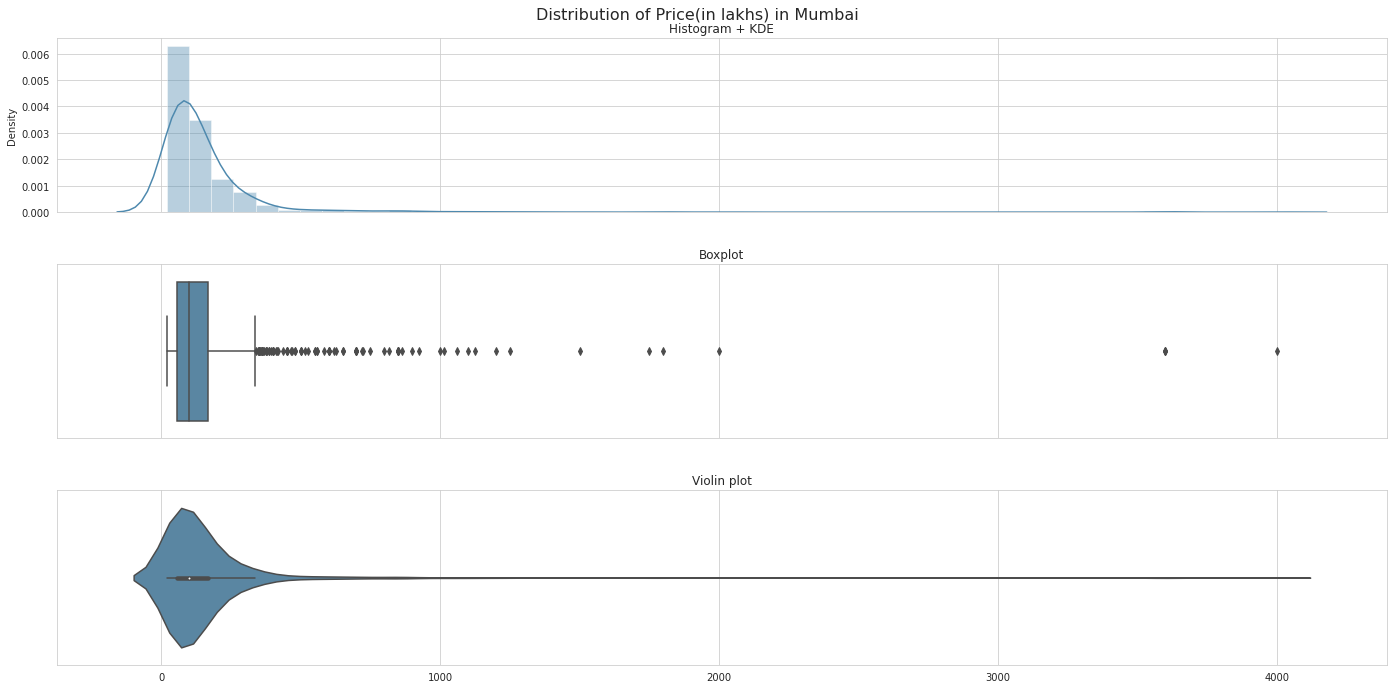

In [26]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


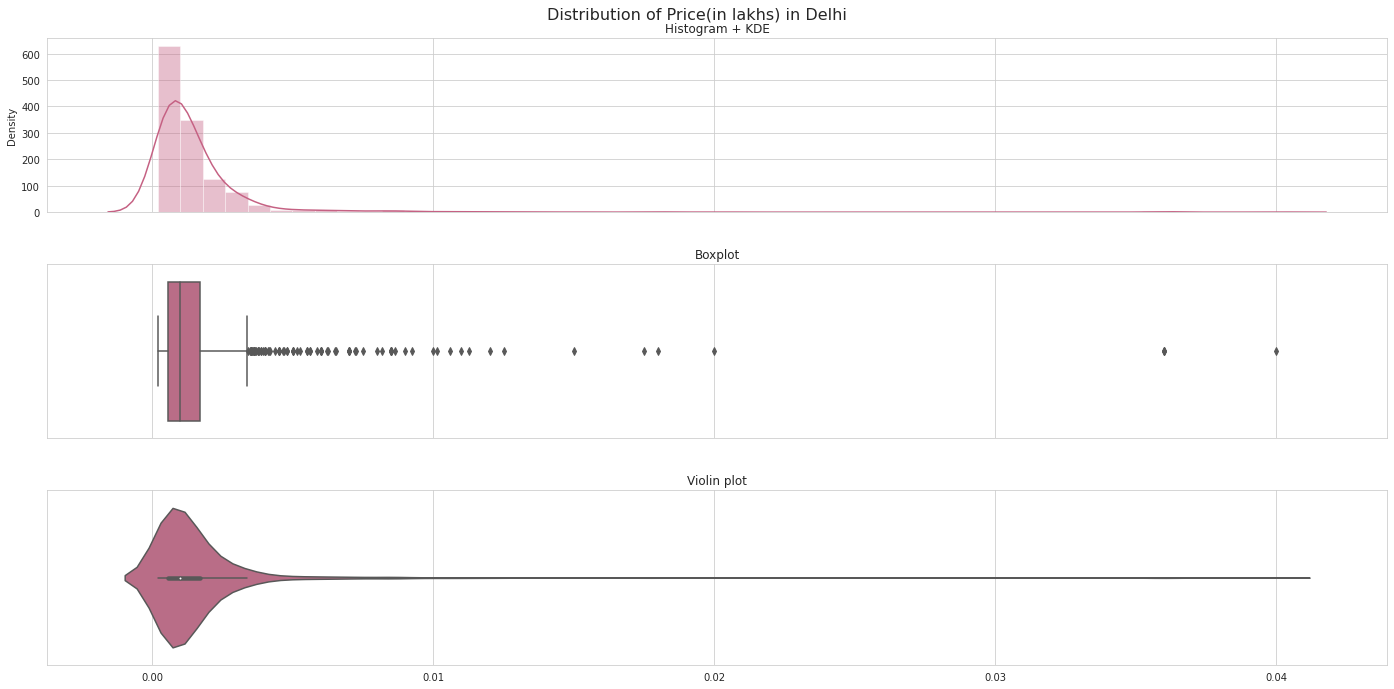

In [27]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


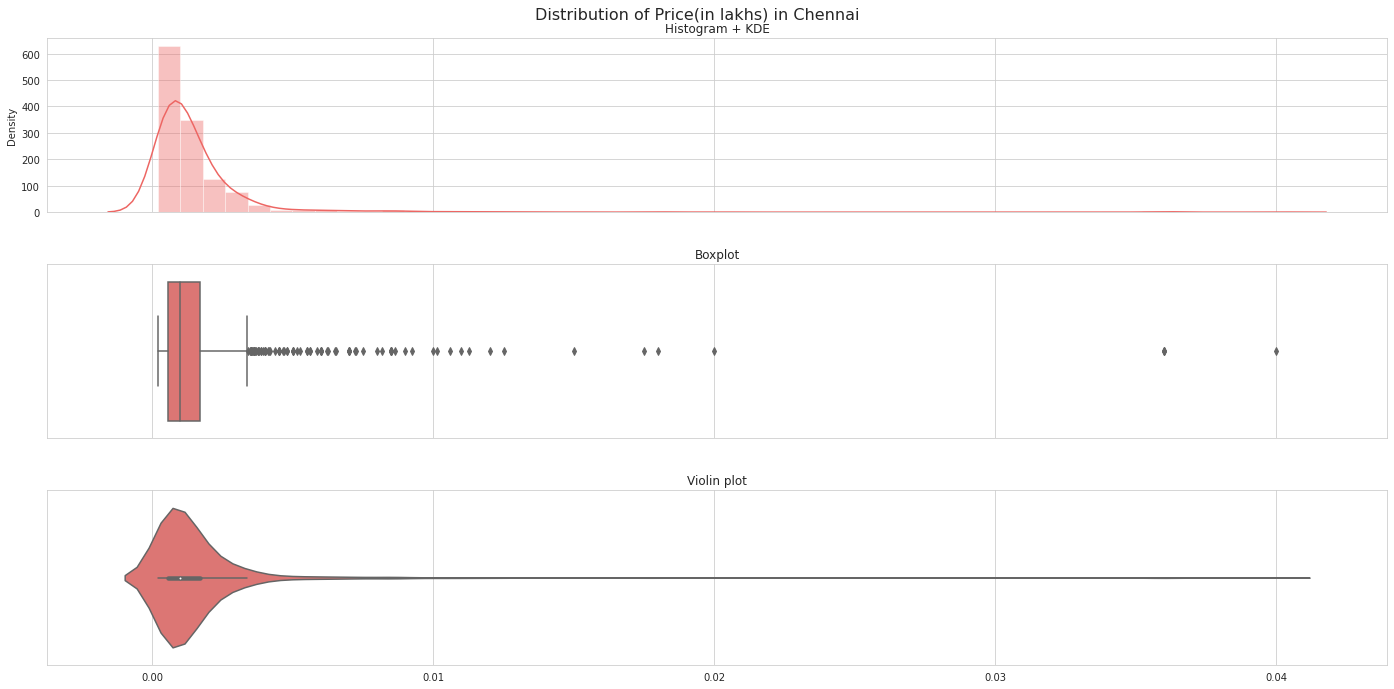

In [28]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


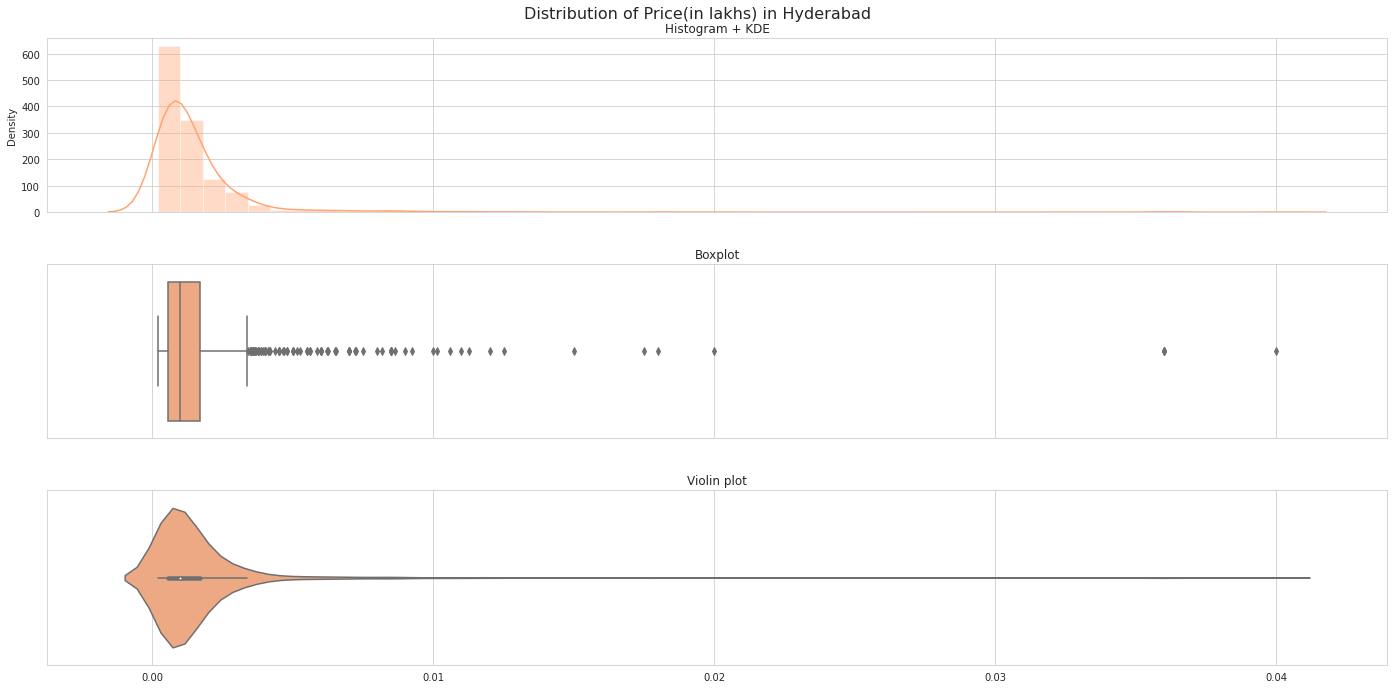

In [29]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

In [30]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

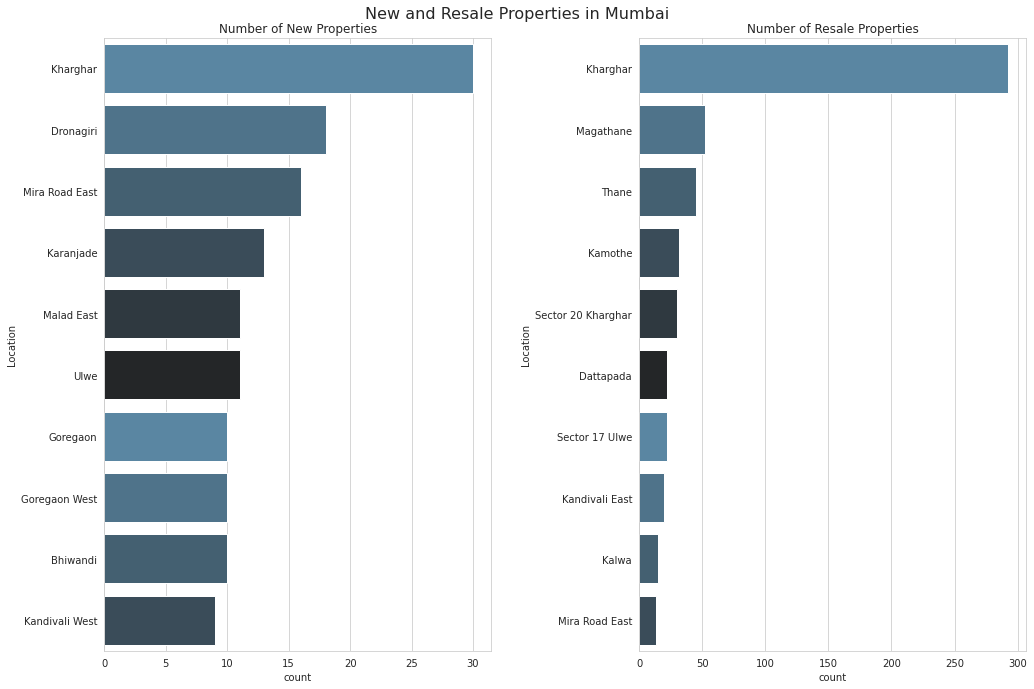

In [31]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

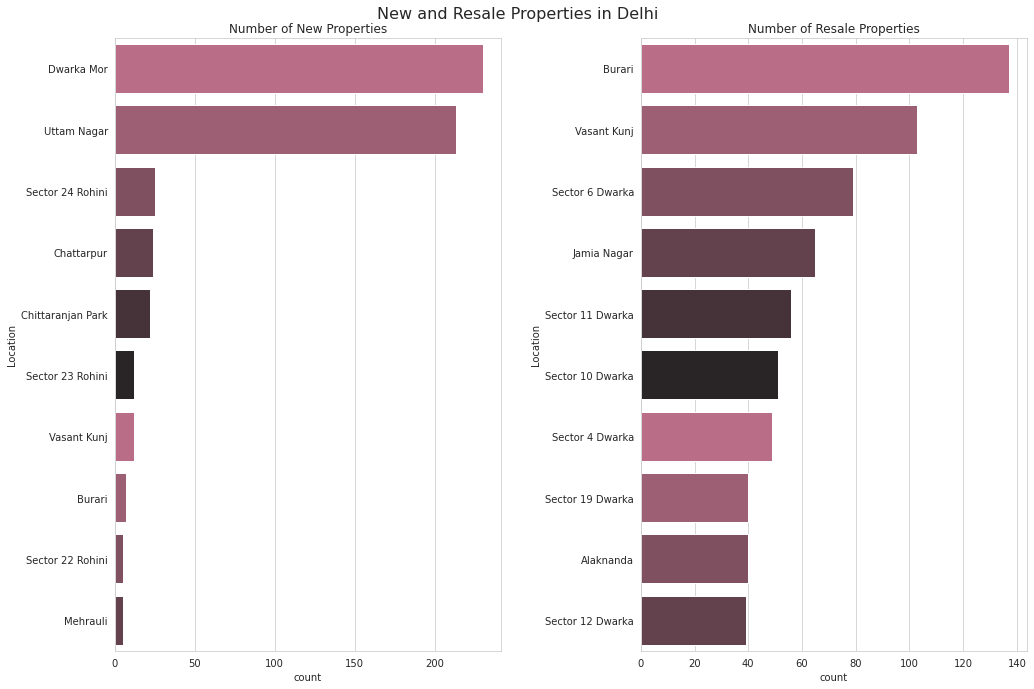

In [32]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

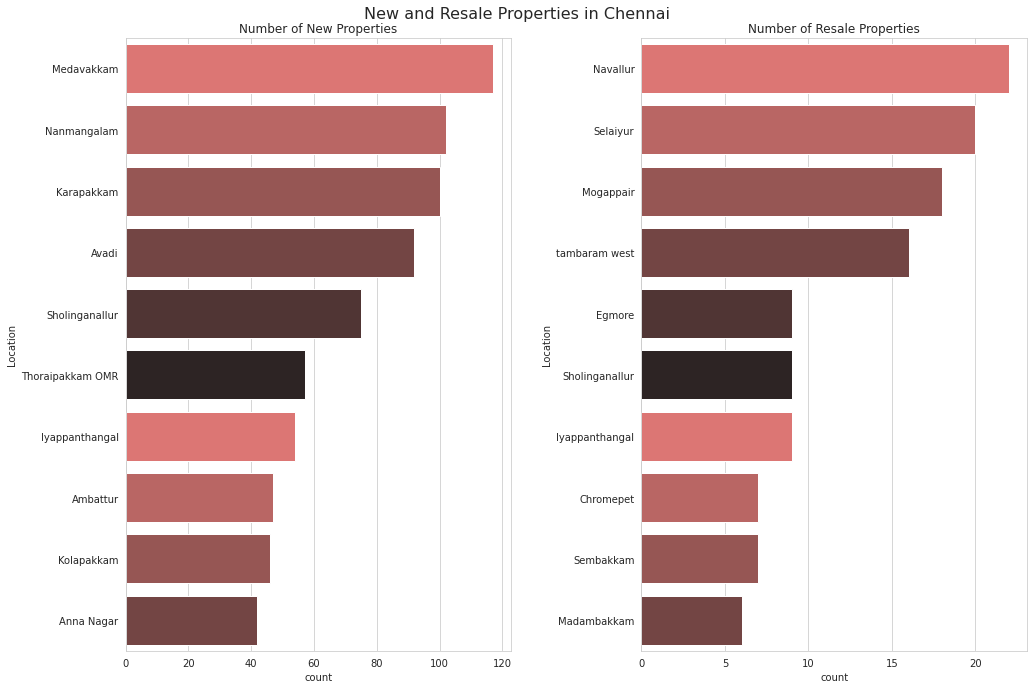

In [33]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

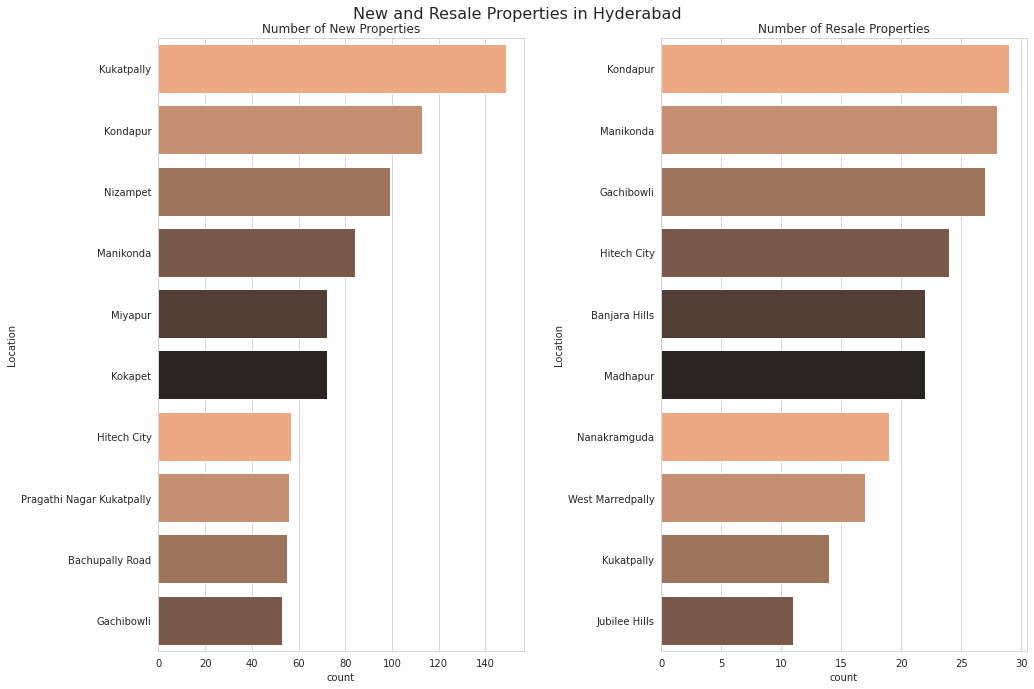

In [34]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

In [35]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

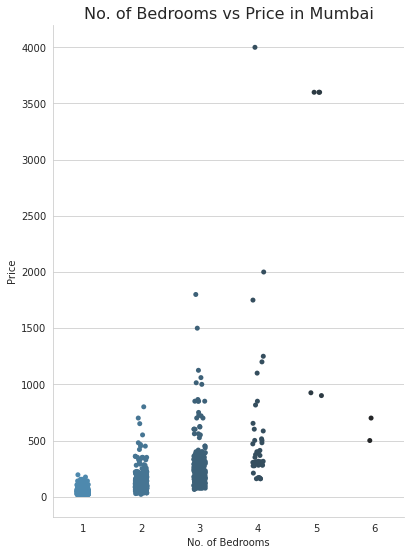

In [36]:
cat_plot(df1,'Mumbai',mumbai)

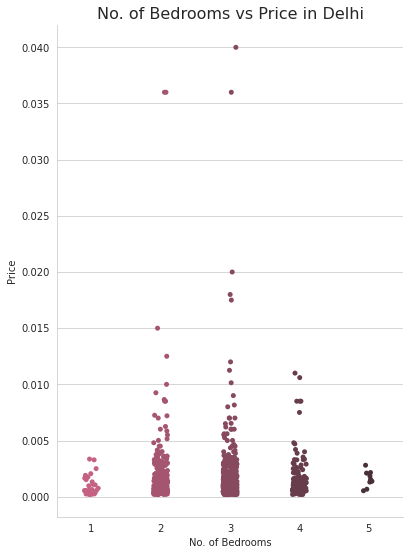

In [37]:
cat_plot(df2,'Delhi',delhi)

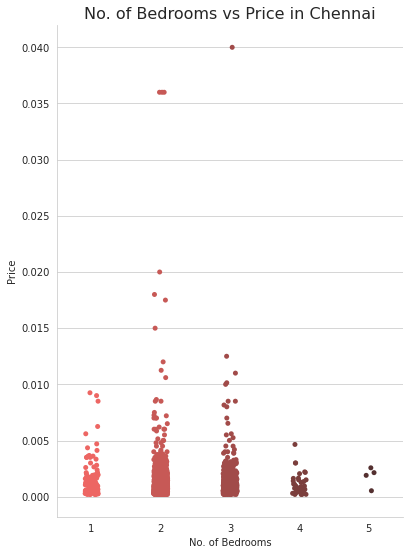

In [38]:
cat_plot(df3,'Chennai',chennai)

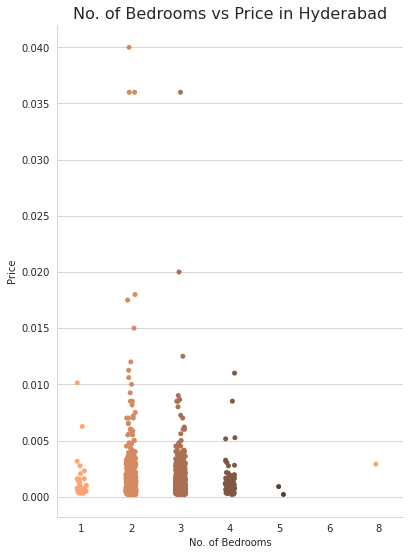

In [39]:
cat_plot(df4,'Hyderabad',hyderabad)

In [40]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

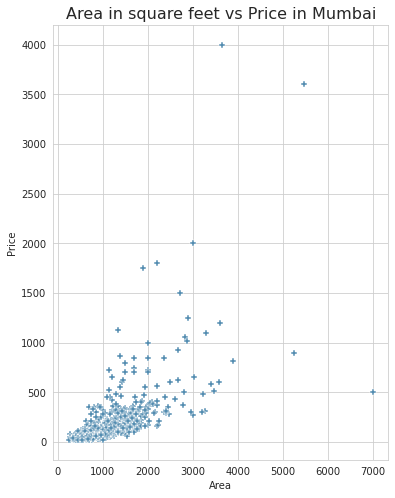

In [41]:
scatter_plot(df1,'Mumbai',custom_colors[0])

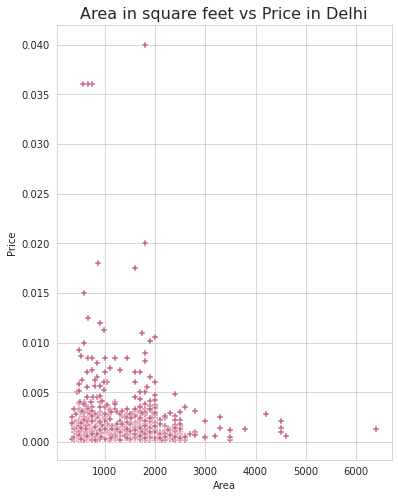

In [42]:
scatter_plot(df2,'Delhi',custom_colors[1])

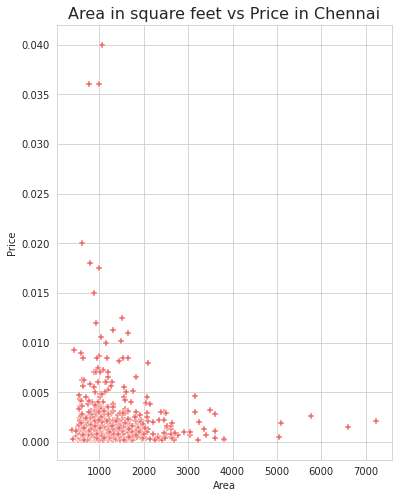

In [43]:
scatter_plot(df3,'Chennai',custom_colors[2])

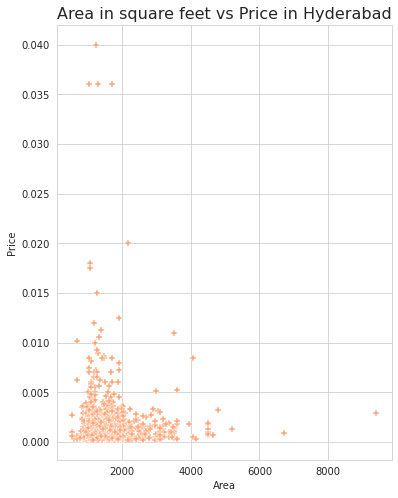

In [44]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

In [45]:
frames = [df1,df2,df3,df4]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [46]:
def preprocess(df) :
    df = df[['Location','Latitude','Longitude','Price']]
    df = df.replace('NA', np.nan)
    df.dropna(subset=['Latitude'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    return df

In [47]:
map1_df = preprocess(df1)
map2_df = preprocess(df2)
map3_df = preprocess(df3)
map4_df = preprocess(df4)

KeyError: ignored

In [ ]:
city_map = folium.Map(location=[19.08,72.74], zoom_start=11.2, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map1_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map